# Model comparison
===============================

- author Sylvie Dagoret-Campagne
- date November 30th 2016

The purpose is to compare Reptran vs Lowtran. This is an exercice to prepare LibRadTran-Retran wrt Modtran


In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline


/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import pandas as pd
import os
import re

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [4]:
import libLSSTMagnitude as magnit

In [5]:
path_atm_rt_us_sa_rt_oz='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sa/rt/oz/out'
path_atm_rt_us_sa_lt_oz='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sa/lt/oz/out'
path_atm_rt_us_sa_rt_pwv='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sa/rt/pwv/out'
path_atm_rt_us_sa_lt_pwv='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sa/lt/pwv/out'
#
path_atm_rt_sw_sa_rt_oz='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/sw/sa/rt/oz/out'
path_atm_rt_sw_sa_lt_oz='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/sw/sa/lt/oz/out'
path_atm_rt_sw_sa_rt_pwv='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/sw/sa/rt/pwv/out'
path_atm_rt_sw_sa_lt_pwv='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/sw/sa/lt/pwv/out'

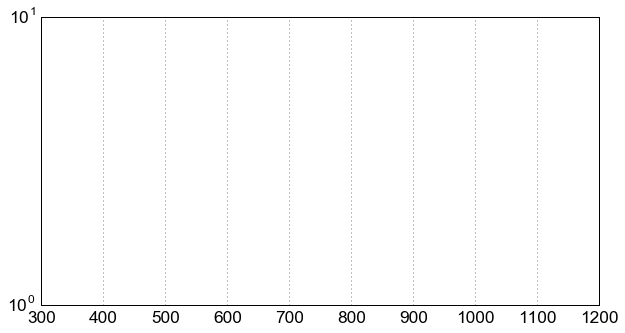

In [6]:
wl,sed=magnit.MakeSED(lambda_min=300.,lambda_max=1200.,dlambda=1.,slope=0)
plt.semilogy(wl,sed)

In [7]:
flt=magnit.Filter()    
wl_u,u=flt.get_u_tr()
wl_g,g=flt.get_g_tr()
wl_r,r=flt.get_r_tr()
wl_i,i=flt.get_i_tr()
wl_z,z=flt.get_z_tr()
wl_y4,y4=flt.get_y4_tr()

In [8]:
atm1=magnit.RT_Atmosphere(path_atm_rt_us_sa_rt_oz)  
(wl_atm1,tr_atm1)=atm1.get_air_transparency("RT_LS_pp_us_sa_rt_z10_oz30.OUT")

In [9]:
atm2=magnit.RT_Atmosphere(path_atm_rt_us_sa_lt_oz)  
(wl_atm2,tr_atm2)=atm2.get_air_transparency("RT_LS_pp_us_sa_lt_z10_oz30.OUT")

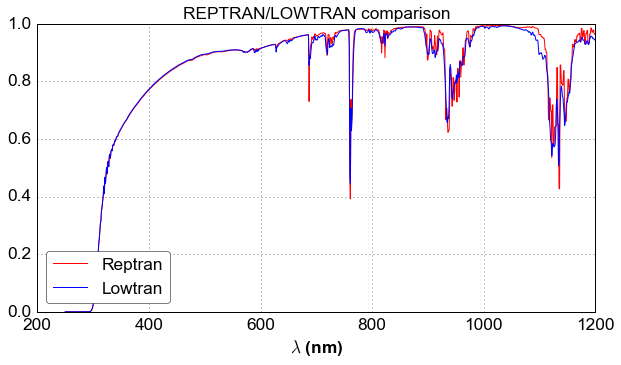

In [18]:
plt.plot(wl_atm1,tr_atm1,'r-',label='Reptran')
plt.plot(wl_atm2,tr_atm2,'b-',label='Lowtran')
plt.legend(loc=3)
plt.title('REPTRAN/LOWTRAN comparison')
plt.xlabel('$\lambda$ (nm)')
plt.savefig("airtransp.jpg")

In [11]:
mag=magnit.LSST_Magnitude() 

In [12]:
m_fl1_u=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,wl_atm1,tr_atm1,wl_u,u)
m_fl1_g=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,wl_atm1,tr_atm1,wl_g,g)
m_fl1_r=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,wl_atm1,tr_atm1,wl_r,r)
m_fl1_i=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,wl_atm1,tr_atm1,wl_i,i)
m_fl1_z=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,wl_atm1,tr_atm1,wl_z,z)
m_fl1_y4=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,wl_atm1,tr_atm1,wl_y4,y4)

In [13]:
m_fl2_u=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,wl_atm2,tr_atm2,wl_u,u)
m_fl2_g=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,wl_atm2,tr_atm2,wl_g,g)
m_fl2_r=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,wl_atm2,tr_atm2,wl_r,r)
m_fl2_i=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,wl_atm2,tr_atm2,wl_i,i)
m_fl2_z=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,wl_atm2,tr_atm2,wl_z,z)
m_fl2_y4=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,wl_atm2,tr_atm2,wl_y4,y4)

In [14]:
du=m_fl2_u-m_fl1_u ; print 'du = ', du
dg=m_fl2_g-m_fl1_g ; print 'dg = ', dg
dr=m_fl2_r-m_fl1_r ; print 'dr = ', dr
di=m_fl2_i-m_fl1_i ; print 'di = ', di
dz=m_fl2_z-m_fl1_z ; print 'dz = ', dz
dy4=m_fl2_y4-m_fl1_y4 ; print 'dy4 =', dy4

du =  -0.00301751784275
dg =  -0.00263704437523
dr =  0.00153843533029
di =  0.00799949481063
dz =  0.00730135865021
dy4 = 0.00445196198636


In [15]:
fl1_u=mag.ComputeSEDxAtmxFilt(wl,sed,wl_atm1,tr_atm1,wl_u,u)
fl1_g=mag.ComputeSEDxAtmxFilt(wl,sed,wl_atm1,tr_atm1,wl_g,g)
fl1_r=mag.ComputeSEDxAtmxFilt(wl,sed,wl_atm1,tr_atm1,wl_r,r)
fl1_i=mag.ComputeSEDxAtmxFilt(wl,sed,wl_atm1,tr_atm1,wl_i,i)
fl1_z=mag.ComputeSEDxAtmxFilt(wl,sed,wl_atm1,tr_atm1,wl_z,z)
fl1_y4=mag.ComputeSEDxAtmxFilt(wl,sed,wl_atm1,tr_atm1,wl_y4,y4)

In [16]:
fl2_u=mag.ComputeSEDxAtmxFilt(wl,sed,wl_atm2,tr_atm2,wl_u,u)
fl2_g=mag.ComputeSEDxAtmxFilt(wl,sed,wl_atm2,tr_atm2,wl_g,g)
fl2_r=mag.ComputeSEDxAtmxFilt(wl,sed,wl_atm2,tr_atm2,wl_r,r)
fl2_i=mag.ComputeSEDxAtmxFilt(wl,sed,wl_atm2,tr_atm2,wl_i,i)
fl2_z=mag.ComputeSEDxAtmxFilt(wl,sed,wl_atm2,tr_atm2,wl_z,z)
fl2_y4=mag.ComputeSEDxAtmxFilt(wl,sed,wl_atm2,tr_atm2,wl_y4,y4)

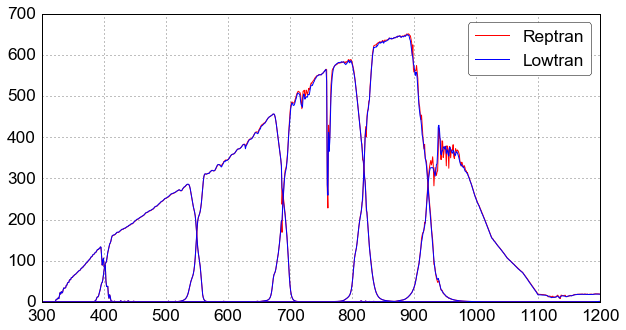

In [20]:
plt.plot(wl,fl1_u,'r-',label='Reptran')
plt.plot(wl,fl2_u,'b-',label='Lowtran')  

plt.plot(wl,fl1_g,'r-')
plt.plot(wl,fl2_g,'b-')    

plt.plot(wl,fl1_r,'r-')
plt.plot(wl,fl2_r,'b-')  

plt.plot(wl,fl1_i,'r-')
plt.plot(wl,fl2_i,'b-') 

plt.plot(wl,fl1_z,'r-')
plt.plot(wl,fl2_z,'b-') 

plt.plot(wl,fl1_y4,'r-')
plt.plot(wl,fl2_y4,'b-') 

plt.legend(loc=1)
plt.savefig("compmagnit.jpg")